# Feature Neutralization

feature neutralization（factor neutralization）はKaggleやNumeraiで使われる特徴量の変換手法

> feature neutralizationはneutralにしたい変数を、ターゲットに対して直交化して置き換える処理をしています。
>
> [feature neutralizationによる正則化 | Coding Memorandum](https://yaakublog.com/numerai-feature-neutralization)


In [4]:
import pandas as pd
import numpy as np

def neutralize_series(series, by, proportion=1.0):
    scores = series.values.reshape(-1, 1)
    exposures = by.values.reshape(-1, 1)

    # this line makes series neutral to a constant column so that it's centered and for sure gets corr 0 with exposures
    exposures = np.hstack(
        (exposures, np.array([np.mean(series)] * len(exposures)).reshape(-1, 1))
    )

    correction = proportion * (exposures.dot(np.linalg.lstsq(exposures, scores)[0]))
    corrected_scores = scores - correction
    neutralized = pd.Series(corrected_scores.ravel(), index=series.index)
    return neutralized

/tmp/ipykernel_331/527208119.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  correction = proportion * (exposures.dot(np.linalg.lstsq(exposures, scores)[0]))


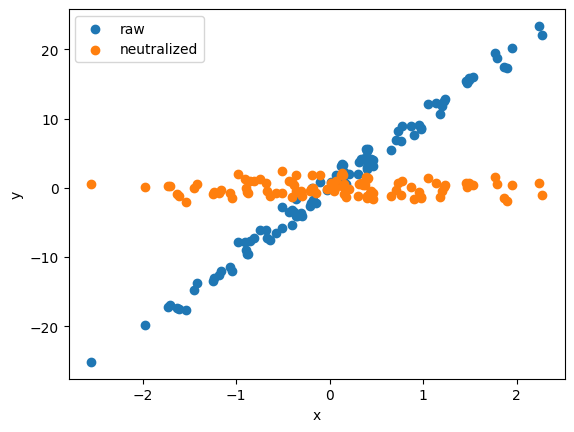

In [13]:
import matplotlib.pyplot as plt

n = 100
np.random.seed(0)
x = np.random.normal(size=n)
y = 10 * x + np.random.normal(size=n)

y_ = neutralize_series(pd.Series(y), pd.Series(x), proportion=1.0)

fig, ax = plt.subplots()
ax.scatter(x, y, label="raw")
ax.scatter(x, y_, label="neutralized")
ax.set(xlabel="x", ylabel="y")
ax.legend()
fig.show()

## 参考

- [[JaneStreet] Avoid Overfit: Feature Neutralization | Kaggle](https://www.kaggle.com/code/code1110/janestreet-avoid-overfit-feature-neutralization)
- [Feature Neutralization as Numerai | Kaggle](https://www.kaggle.com/code/luisandresgarcia/feature-neutralization-as-numerai/notebook)